# Random discrete events


### Context and assumptions

Let's say that we're interested in the seemingly random occurrence of a certain type of event.
These events occur one-at-a-time, and independently of each other - i.e. the likelihood of an event is unaffected by previous occurrences.
Let's also say that we're able to count the number of events in a measurable time interval, and when doing so we realise that, although individual events occur at random intervals, the average event rate is constant.

In situations where these conditions hold, the number of events in a given interval, denoted $N$, is a *Poisson random variable*, whose distribution is given by the *Poisson distribution*.

There are many real-world examples where the Poisson distribution may be used to model the number of events in a certain time interval, such as:

* Photons detected by a telescope.
* Radioactive decays.
* Mutations in cells.
* Telephone calls at a call-center.
* Other rare events, such as earthquakes, floods, meteorite impacts, pandemics.

### Constant probability over a fixed time interval

To begin with, we denote the probability of an event occurring during an interval $\delta t$ as
$$P(1 | \delta t) = \lambda \delta t$$

If $\delta t$ is taken to be sufficiently small, such that the possibility of more than one event occurring within the interval can be neglected, we can also take the probability of no events occurring as
$$P(0 | \delta t) = 1 - \lambda \delta t$$

We are going to use numpy's random number generator to simulate the occurrence of such events.
We will do this by drawing an array of random numbers between 0 and 1, and identifying events as array elements which are smaller than $\lambda \delta t$.
Note that since we are on a computer we are free to set $\delta t = 1$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln

# ---------------------------- #
#  User-controlled parameters  #

lam = 0.01 # probability of a single event occurring in a single 'time-step'
tf = 10000 # number of time-steps
reps = 1000 # number of repetitions of tf time-steps

# ---------------------------- #

## Generate an array of random numbers: (row, col) = (repeat no., time-step)
rn = np.random.random( (reps, tf) )

## Convert rn into boolean array with 'True' corresponding to events
ev = rn < lam

## Since 'True'==1 and 'False'==0, taking the cumulative sum of ev gives
## the number of events which have occurred by a given time-step
cev = ev.cumsum(axis=1)

## Useful: array of timesteps from 1-tf
t_range = np.arange(tf)+1

### Sanity checking

Let's just check that what we've done is working.

* We should expect a simulation of $t_f$ (`tf`) steps to consist of roughly $N = \lambda t_f$ events.
* These events should occur at random intervals, described by the random variable $L$.

Both $N$ and $L$ are random variables whose distributions characterise different aspects of a Poisson process.
We will shortly see that $N$ is distributed according to a Poisson distribution, and $L$ according to an exponential distribution.

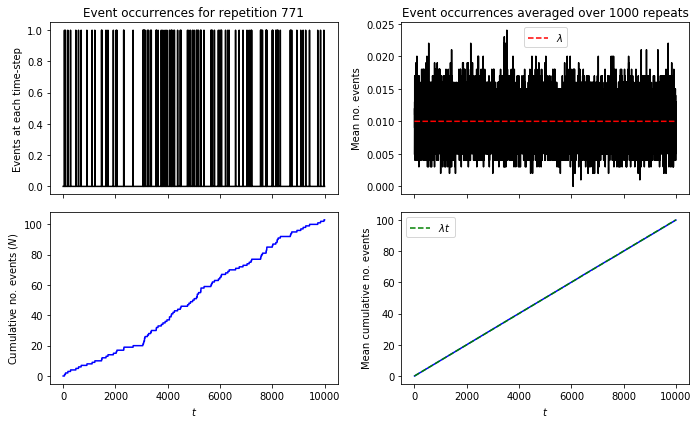

In [11]:
## Plot a typical instance of tf time-steps
rep = np.random.randint(0,reps)

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(10,6))

ax.set_title("Event occurrences for repetition %d" %rep)
ax2.set_title("Event occurrences averaged over %d repeats" %reps)
ax3.set_xlabel("$t$")
ax4.set_xlabel("$t$")

ax.set_ylabel("Events at each time-step")
ax.plot(t_range, ev[rep,:], 'k-')

ax2.set_ylabel("Mean no. events")
ax2.plot(t_range, ev.mean(axis=0), 'k-')
ax2.plot(t_range, np.ones(tf)*lam, 'r--', label="$\lambda$")
ax2.legend()

ax3.set_ylabel("Cumulative no. events ($N$)")
ax3.plot(t_range, cev[rep,:], 'b-')

ax4.set_ylabel("Mean cumulative no. events")
ax4.plot(t_range, cev.mean(axis=0), 'b')
ax4.plot(t_range, t_range*lam, 'g--', label="$\lambda t$")
ax4.legend()

plt.tight_layout()
plt.show()

## The Poisson distribution

The Poisson distribution describes the probability of $N=n$ events occurring in an interval $t$, where such events occur independently and with a fixed rate $\lambda$.
We are going to first derive the Poisson distribution, and then check that our simulations agree.

### Derivation

#### Probability of 0 events occuring in an interval $t$

Recall that the probability of an event occurring in an interval $\delta t$ is $P(1 | \delta t) = \lambda \delta t$, and that if $\delta t$ is sufficiently small that $P(N>1 | \delta t)$ can be neglected, then $P(0 | \delta t) = 1 - \lambda \delta t$.

The probability that there have been no events in an interval $t + \delta t$ can be written as a product:

$$P(0 | t + \delta t) = P(0 | t) [1 - \lambda \delta t]$$

which can be rearranged to give
$$\frac{P(0 | t + \delta t) - P(0 | t)}{\delta t} = - \lambda P(0 | t)$$

In the limit of small $\delta t$, this becomes
$$\frac{dP(0 | t)}{dt} + \lambda P(0 | t) = 0 $$

which has the general solution
$$ P(0 | t) = C e^{-\lambda t} $$

where the boundary condition $P(0 | 0) = 1$ requires that $C=1$.

#### Problem 1: Probability of 1 event occuring

Starting from the equation
$$P(1 | t + \delta t) = P(1 | t)[1-\lambda \delta t] + P(0 | t)\lambda \delta t$$

show that the probability of one event occuring is given by
$$P(1 | t) = \lambda t e^{-\lambda t}$$

**Hint:** Use the integrating factor method, with integrating factor $e^{-\lambda t}$.

#### Problem 2: Extending this to arbitrary $n$

Prove, by induction, that the correct expression is
$$P(n | t) = \frac{\lambda^n t^n}{n!} e^{-\lambda t}$$

This is the probability mass function of the Poisson distribution:
$$f_N(n | t,\lambda) = \frac{\lambda^n t^n}{n!} e^{-\lambda t}$$

Note that the combination $\lambda t$ is often substituted for a single parameter, e.g. $\Lambda$, which is the average number of events for the interval in question.


### Checking against simulations

Let's see if our simulations follow the above distribution.
This will work better with a large number of repeats (e.g. 10,000).

**Note**: the function used in the code for the probability mass function is equivalent to the one we have just derived above, but unlike the above it is numerically stable.

#### $P(n | t)$ as a function of $t$

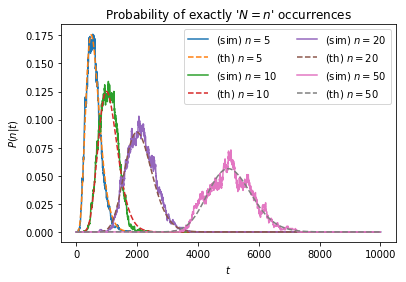

In [29]:
## Choose values of 'n' to plot
n_list = [5,10,20,50]

## Plot the theoretical (Poisson) distribution
plot_th = True

plt.figure(2)
plt.title("Probability of exactly '$N=n$' occurrences")
plt.xlabel("$t$")
plt.ylabel("$P(n | t)$")

for n in n_list:
    pt = np.zeros(tf) # probability as a function of t
    
    nev = cev == n # boolean array
    for ti in range(tf):
        pt[ti] = np.sum(nev[:,ti]) / float(reps)
    
    plt.plot(t_range, pt, '-', label="(sim) $n=$%d" %n)
    
    if plot_th == True:
        pois = np.exp(n*np.log(lam*t_range) - lam*t_range - gammaln(n+1))
        plt.plot(t_range, pois, '--', label="(th) $n=$%d" %n)

plt.legend(ncol=2)
plt.show()

#### $P(n; t)$ for fixed $t$

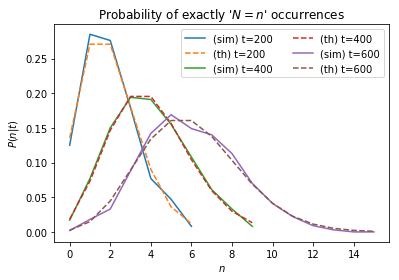

In [25]:
## Choose values of 't' to plot (must be <= tf specified above)
t_list = [200,400,600]

## Plot the theoretical (Poisson) distribution
plot_th = True

plt.figure(3)
plt.title("Probability of exactly '$N=n$' occurrences")
plt.xlabel("$n$")
plt.ylabel("$P(n | t)$")

for t in t_list:
    
    ## Find maximum n
    nmax = np.max(cev[:,t-1])
    n_range = np.arange(nmax)

    pn = np.zeros(nmax) # probability as a function of n
    
    for ni in range(nmax):
        nev = cev[:,t-1] == ni
        pn[ni] = np.sum(nev) / float(reps)

    plt.plot(n_range, pn, label="(sim) t=%d" %t)
    
    if plot_th == True:
        pois = np.exp(n_range*np.log(lam*t) - lam*t - gammaln(n_range+1))
        plt.plot(n_range, pois, '--', label="(th) t=%d" %t)

plt.legend(ncol=2)
plt.show()

### Poisson statistics

#### Mean

The expectation value of $N$ is given by
$$ E[N] = \sum_n n f_N(n; \lambda, t) $$

Noting that the $n=0$ term does not contribute, this works out as
$$ E[N] = \sum_{n=1}^{\infty} n \frac{\lambda^n t^n}{n!} e^{-\lambda t} \\
= \lambda t e^{-\lambda t} \sum_{n=1}^{\infty} \frac{\lambda^{n-1} t^{n-1}}{(n-1)!} \\
= \lambda t e^{-\lambda t} \sum_{m=0}^{\infty} \frac{\lambda^{m} t^{m}}{m!} \\
= \lambda t e^{-\lambda t} e^{\lambda t} \\
= \lambda t
$$

#### Problem 3: Variance

The variance of $N$ is given by 
$$ \text{Var}(N) = E[N^2] - E[N]^2 $$

Show that the variance of the Poisson distribution is also equal to $\lambda t$.

**Hint:** $E[N^2] = E[N(N-1)] + E[N]$

#### Checking against simulations

We can use repeated simulations to estimate the mean and variance of $N$ for each $t$, which should be equal to $\lambda t$ to agree with theory.
If we divide by $t$, we can get an even better result by also averaging over all time-steps, and check for agreement with $\lambda$.

In fact, the simulation results will slightly disagree with theory.
This is because the upper-end of the distribution is suppressed due to the limit set by $t_f$.

In [26]:
## Calculate the mean and variance of N for each timestep, then average over timesteps.
print "Statistics:"
print "Mean event rate: %.3g" %np.mean(cev.mean(axis=0)/t_range)
print "Variance: %.3g" %np.mean(cev.var(axis=0, ddof=1)/t_range)
print "(Averaged over all timesteps)"

Statistics:
Mean event rate: 0.01
Variance: 0.00985
(Averaged over all timesteps)


## Time between events: the exponential distribution

An alternative way of capturing the behaviour of discrete random events involves studying the distribution of a different random variable - the time elapsed between successive events, denoted by $L$.

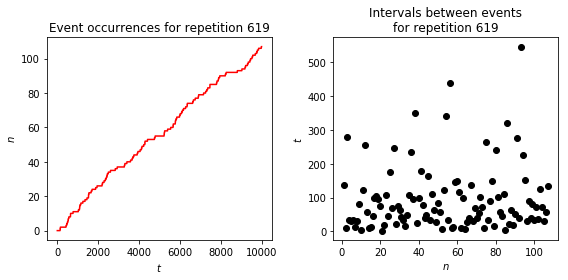

In [27]:
## Compute the time interval 'L' between successive events
tev = np.where(ev==True)
L_list = []
for rep in xrange(reps):
    tev = np.where(ev[rep]==True)[0]
    nev = len(tev)
    if nev == 0:
        L_list.append([])
        continue
    Lev = np.ones(nev)*tev[0]
    if len(tev) > 1:
        for ni in range(1,nev):
            Lev[ni] = tev[ni]-tev[ni-1]
    L_list.append(Lev)


## Plot a typical instance of tf time-steps
rep = np.random.randint(0,reps)
Ln = L_list[rep]
n_range = range(1,len(Ln)+1)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax.set_title("Event occurrences for repetition %d" %rep)
ax.set_xlabel("$t$")
ax.set_ylabel("$n$")
ax.plot(t_range, cev[rep,:], 'r-')

ax2.set_title("Intervals between events\nfor repetition %d" %rep)
ax2.set_xlabel("$n$")
ax2.set_ylabel("$t$") # abuse of notation!
ax2.plot(n_range, L_list[rep], 'ko')

plt.tight_layout()
plt.show()

### Derivation

We have already derived the probability of no events occurring in an interval $t$ (the Poisson distribution with $N=0$)
$$ P(0 | t) = e^{-\lambda t} $$

This is equivalent to the probability that the time elapsed between events is greater than t, i.e.
$$ P(N=0 | t) = P(L > t) $$ 

Which immediately implies that
$$ P(L \leq t) = 1 - e^{-\lambda t} $$

This is the cumulative distribution function $F_L$ for the random variable $L$, from which the probability density function $f_L$ can be found by differentiating (see notes on distribution functions).
Hence,
$$ f_L(t | \lambda) = \lambda e^{-\lambda t} $$

This is the PDF of the exponential distribution, and it describes the time elapsed between successive events in a Poisson process.

### Checking against simulations

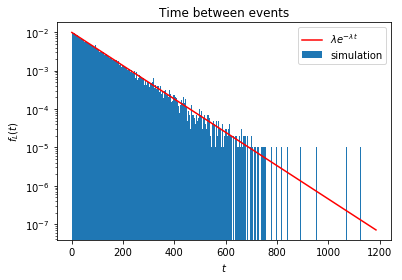

In [28]:
## 'True': log scale for y-axis
logP = True

plt.figure(1)
plt.title("Time between events")
plt.xlabel("$t$")
plt.ylabel("$f_L(t)$")

## Plot distribution of L (including all events from all repetitions)
L_flat = [L for rep in L_list for L in rep]
Lmax = int(np.max(L_flat))
plt.hist(L_flat, bins=np.linspace(0.5,Lmax+0.5,Lmax+1), density=True, log=logP, label="simulation")

## Plot theoretical (exponential) distribution
th = lam * np.exp(-lam * t_range[:Lmax])
plt.plot(t_range[:Lmax], th, 'r-', label="$\lambda e^{-\lambda t}$")

plt.legend()
plt.show()